<div style="font-size: xx-large ; font-weight: 1000 ; color: rgba(0 , 102 , 102 , 0.8) ; line-height: 100%">Discontinuous Galerkin Methods</div>

<div style=" font-size: x-large ; font-weight: 1000 ; color: rgba(0 , 102 , 102 , 0.8) ; line-height: 100%"><br></br><br></br>Number of points per wavelength</div>
<div style='position: relative; left: 50%; transform: translatey(-40%);background-image: url("./figs/crossingvortices_round.jpg") ; padding: 0px ; background-size: contain ; border-radius: 0px ; height: 200px; background-repeat: no-repeat;'>


## Project Description / General 
In this notebook, you are to investigate the number of points per wavelength paradigm more closely. Since we have not talked about DG methods yet, you will use the well-known finite difference method for your investigations - the results are directly transferable to DG! 
**We will only consider the 1D case here!**

 

### Specific Tasks:
#### Part A: Evaluation of FD derivatives
In the following, we consider the function $$f(x)=sin(2\pi k x), \quad x\in(0,1)$$ with periodic boundary conditions. Set the wavenumber k to 2 for now. Remember the definition of the number of points per wavelength $n_{ppw}$: You can set this number by choosing the number of grid/sampling points $n_p$.  

a) Write a function (via "def function():") that allows you to sample a function on an equispaced grid (1D) for a given number of points $n_p$. You can use the linspace command (included in the numpy package) to generate the grid. The function should also provide the analytical derivate at the grid points. Plot the function and its derivative to make sure you got it right.

b) Implement a function to compute the first derivative w.r.t x numerically, i.e. $$\frac{d}{dx}\approx\frac{\Delta}{\Delta x}.$$ 

 The derivative should be computed by
- a two-point forward difference, i.e. the simplest FD stencil and probably the one you learned first in the B.Sc. classes, 
- a two-point backward difference, 
- a two-point central difference and 
- a 4th choice that is of third order accuracy or above. 

Look up the FD stencils from textbooks (e.g. Munz and Westermann) or online, and pick one that seems suitable as a 4th choice, list the definition of your chosen method here. Apply this functions to compute the numerical first derivative of $f(x)$. Check (e.g. by plotting) that your solution makes sense. **Important: At the boundaries of the domain, you may run into trouble when parts of the FD stencil require information from outside of the domain. There are a number of possible ways around this, e.g.: implement periodic boundary conditions via ghost cells and evaluate the derivative as usual. An easier way for now is to only apply the FD stencil at the "inner" grid points, so you do not need to worry about the boundaries at the moment.** Show a plot of the function, its analytical and numerical derivatives for a $n_p$ of your choice. Comment on the results. 

c) Compute the error in the so-called "L infinity norm" between the analytical and numerical derivatives in your domain. 
$$L_{\infty}=\max_{n_p}\left(| f_{x,exact} - f_{x}|\right) $$ 

This error is just the maximum over all pointwise errors. **Note that if you compute the FD derivative on the inner points only, then the error should also be only taken over those points**. Plot the error norms over the number of grid points n_p for the different FD methods. To do this, you need to compute the error for a range of n_p values starting from n_p = 8 . Your plot should look similar to the one below. Compare your results to the theoretical behavior you expect to see. 

<div class="image12">
            <img src="./figs/fd_derivatives_k2.png" width="500" />
    </div>
    
d) Repeat c) for a wavenumber of k=8. Compare the results to k=2, and discuss. 

e) Get a rough estimate for the value of $n_{ppw}$ number for the 4 FD stencils investigated by doing the following: from the plots in c), find out how many points $n_p$ are required for the error to drop (from the initial value for $n_p=8$) one order of magnitude. Compute $n_{ppw}$ from that number, and list them in a table.

#### Part B: FD code for linear scalar advection 
We will now investigate the influence of the $n_{ppw}$ on an actual simulation. As the simplest of model equations, we use the linear scalar advection of a quantity u(x,t):
$$\frac{\partial u}{\partial t}+\frac{\partial u}{\partial x}=0$$

Since you have already implemented the spatial derivative d/dx above, only two items are missing: 

a) The time integration to advance the solution u from timestep n to n+1. While it is up to you how you do that, the simplest method that works well here is the Euler forward (explicit Euler) method. From the previous / B.Sc. classes, remember that this method can be written as (https://en.wikipedia.org/wiki/Euler_method)
$$u^{n+1}=u^n+\Delta t f(u^n, t^n)$$,
given the initial value problem $$\frac{du}{dt}=f(u,t)$$. Note that you need to estimate the step size $\Delta t$ in a meaningful way. Hint: CFL number. **Note carefully: The explicit Euler method is a good choice in combination with a first order upwind spatial discretization. For other choices, you may run into stability problems.**

b) As mentioned before, the periodic boundary conditions require a special treatment. Just computing the inner points (as above) does no longer work out, so think about how to implement them. Here are two suggestions: 1) Use ghost layers to extend the domain virtually and copy the appropriate values to the ghost points. Then again compute the derivatives over the extended "inner" points. 2) It is ok to use the analytical boundary conditions here as well, which you can easily compute from the exact solution of the advection problem. Remember that for these types of problems, the solution at t>0 is just $$u(x,t)=u_0(x-t)$$, where $u_0$ is the initial solution. 


Implement a) and b) and run the problem on a domain $x\in(0,1) $ with a wavenumber k=2 for one full period $T=1$. Use a first order appropriate FD method (just one is required, not all 4 from above!) from the ones implemented in part A (note that this is an advection problem with a fixed transport direction. Remember what you learned about appropriate stencils for hyperbolic problems and the direction of information transport). Use an explicit Euler method for time integration. Your solution should look similar to the figure below:
<div class="image12">
            <img src="./figs/fd_advection_np50.png" width="500" />
    </div>
  
 
Examine again the influence of n_p on the solution quality. To quantify the error, compute again the $L_\infty$ error **at t=T**, and plot it as a function of $n_p$. 
Discuss your results. Was your $n_{ppw}$ criterion from Part A a good choice? Why or why not? 

c) **BONUS POINTS**: Implement a second order upwind FD stencil, e.g. the (1/-4/3) variant we talked about in class. Combine it with Heun's method for temporal integration https://en.wikipedia.org/wiki/Heun%27s_method. Investigate again the influence of n_p on the accuracy. Can you confirm the observations made in Part A?


#### Part C: Summary
Summarize your results in a few bullet points. How is the order of accuracy of an approximation related to its $n_{ppw}$ value? Did you observe anything else that you found interesting?


**You will submit your results as an ipython notebook via ILIAS. Your notebook should not only contain the python program, but also text/comments/figures. Make use of the static/dynamic structure of these notebooks to document your work and to describe your results. The final notebook should document your work, your ideas and your results. You do not need to write long passages of text, short sentences are sufficient. If you want to include latex-syntax (for equations) that is fine as well. Whenever you are asked to comment, discuss, compare etc. below, this means that you should write *briefly* about your observations and add figures if necessary or helpful.**

**Import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Part A
**(a)** Analytical function and sampling

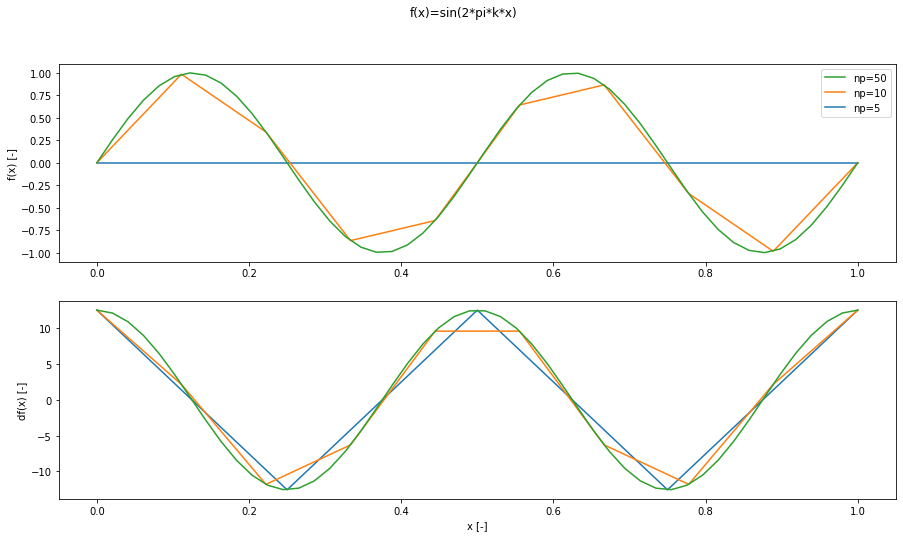

In [2]:
# define sampling function
def sample_fun(n_p=10.0, k=2):
  x=np.linspace(0.0,1.0,num=n_p)
  f=np.sin(2*np.pi*k*x)
  df=2*np.pi*k*np.cos(2*np.pi*k*x)
  return x, f, df

# test sample fun:
x1, f1, df1 = sample_fun(5 ,2)
x2, f2, df2 = sample_fun(10 ,2)
x3, f3, df3 = sample_fun(50,2)

# Plot function
fig, axs = plt.subplots(2, figsize=(15,8))
fig.suptitle('f(x)=sin(2*pi*k*x)')
axs[0].plot(x1, f1,label='np=5')
axs[0].plot(x2, f2,label='np=10')
axs[0].plot(x3, f3,label='np=50')
axs[1].plot(x1, df1)
axs[1].plot(x2, df2)
axs[1].plot(x3, df3)

handles, labels = axs[0].get_legend_handles_labels()

# reverse the order
axs[0].legend(handles[::-1], labels[::-1])
axs[0].set_ylabel('f(x) [-]')
axs[1].set_ylabel('df(x) [-]')
axs[1].set_xlabel('x [-]');

**(b)** As a fourth choice a 2 point central difference of 4th order accuracy is chosen. The first derivative is defined by:
$$
\begin{align}
 \frac{\partial{f}}{\partial{x}} & = \frac{\frac{1}{12} \cdot f(x-2\Delta x) - \frac{2}{3} \cdot f(x-\Delta x) + \frac{2}{3} \cdot f(x+\Delta x) - \frac{1}{12} \cdot f(x+2\Delta x)}{h} \\
  & = \frac{f(x-2\Delta x) - 8 \cdot f(x-\Delta x) + 8 \cdot f(x+\Delta x) - f(x+2\Delta x)}{12 \cdot h}
 \end{align}
$$

Periodic boundary conditions are implemented to treat the edge nodes. Since the computational domain ranges from $0$ to $1$ and the function has the value of 0 both at the left and right edges, the last value is omited and the value at node $x_{end} - \Delta x $ is used as a boundary condition.

In [3]:
class NUM_DIFF:
  def __init__(self,x,f,n_p):
    self.x=x
    self.f=f
    self.n_p=n_p
    self.h=1/(self.n_p-1)

#________________________ 2 point forward difference __________________________#
  def forward_diff(self):
    f=np.append(self.f, self.f[1]) # periodic boundary condition
    df=(f[1:]-f[0:-1])/self.h
    return df

#_______________________ 2 point backward difference __________________________#
  def backward_diff(self):
    f=np.insert(self.f, 0, self.f[-2], axis=0) # periodic boundary condition
    df=(f[1:]-f[0:-1])/self.h
    return df

#________________________ 2 point central difference __________________________#
  def central_diff(self):
    f=np.append(self.f, self.f[1]) # periodic boundary condition    
    f=np.insert(f, 0, self.f[-2], axis=0) # periodic boundary condition
    df=(f[2:]-f[0:-2])/(2*self.h)
    return df
 
 #_______________________ 4 point central difference __________________________#
  def central_diff_O4(self):
    f=np.append(self.f, self.f[1:3]) # periodic boundary condition    
    f=np.insert(f, 0, self.f[-3:-1], axis=0) # periodic boundary condition 
    df=(1/(12*self.h))* (f[:-4]-8*f[1:-3]+8*f[3:-1]-f[4:])   
    return df



In [4]:
x, f, df=sample_fun(50,2)
diff=NUM_DIFF(x, f, 50)

df_forward=diff.forward_diff()
df_backward=diff.backward_diff()
df_central=diff.central_diff()
df_central_O4=diff.central_diff_O4()

As expected the accuracy of the approximation compared to the analytical derivative of the function increases with an icreasing approximation order. Furthermore it can be noticed from the following plot that as expected the relative position of the stencil with the respect to the approximated node (backward/forward) induces a shift in the derivative in the direction of the chosen stencil.

Text(0.5, 0, 'x [-]')

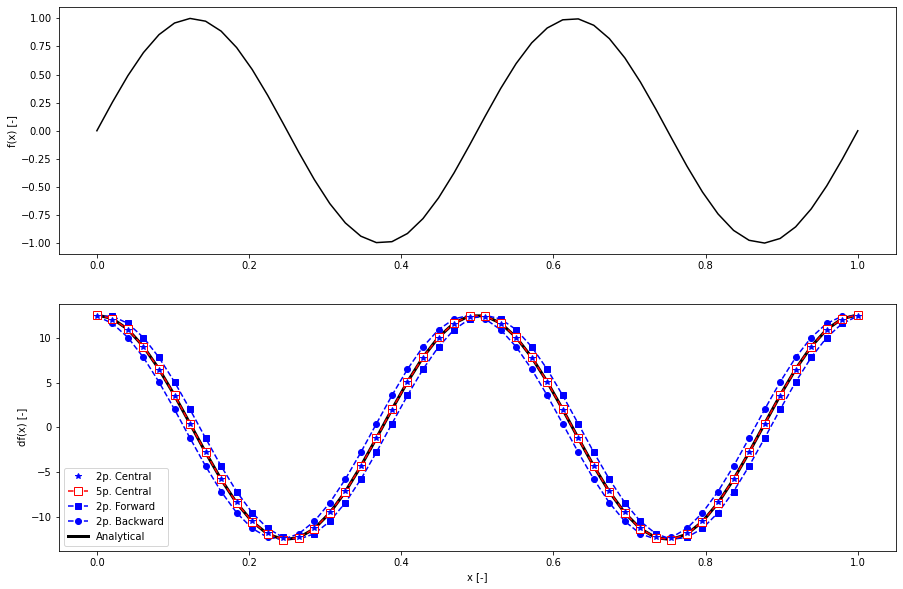

In [5]:
# plot approximations
# Plot function
fig, axs = plt.subplots(2, figsize=(15,10))
axs[0].plot(x, f, 'k-')
axs[1].plot(x, df, 'k-', linewidth=3, label='Analytical')
axs[1].plot(x, df_forward, 'b--o', label='2p. Backward')
axs[1].plot(x, df_backward, 'b--s', label='2p. Forward')
axs[1].plot(x, df_central_O4, 'r--s', markersize=8, markerfacecolor='w', label='5p. Central')
axs[1].plot(x, df_central, 'b*', label='2p. Central')

handles, labels = axs[1].get_legend_handles_labels()

# reverse the order
axs[1].legend(handles[::-1], labels[::-1])
axs[0].set_ylabel('f(x) [-]')
axs[1].set_ylabel('df(x) [-]')
axs[1].set_xlabel('x [-]')

**(c)** In the following we computed the $L_{inf}$ norm of the approximations using different operators with different numbers of grid points $n_p \in [8,8192]$ and compare the error behaviour with $h^p$, $p \in \mathbb{N}$ being the accuracy order of the finite difference operator.

The error of the 2 point forward and backward operator decreases with an increasing number of grid points with $O(1)$.  With an increasing approximation order a quicker decay of the error for increasing number of grid points can be observed. The error of all 4 chosen schemes shows an asymptotical behaviour consistant with the theoretical $(h^p)$ behaviour.

For an increasing wavenumber $k=8$ we observe a quantitative decrease of accuracy. The convergence order of the scheme errors remain coherent with both the thoretical results and results for $k=2$. However an accuracy difference of (approximately) 2 order of magnitude can be observed. The decrease accuracy can be explained with the increasing numer of required grid points to resolve waves with a higher wavenumber: The larger the wavenumber is, the smaller the period is and thus the more changes are caputed within a time frame. Sonsequently more grid points are needed to captured more "complex" behaviour.

In [6]:
n_p_range=np.array([8,16,32,64,128,256,512,1024,2048,4096,8192])

Linf_forward_k2=np.zeros(n_p_range.shape)
Linf_backward_k2=np.zeros(n_p_range.shape)
Linf_central_k2=np.zeros(n_p_range.shape)
Linf_central_o4_k2=np.zeros(n_p_range.shape)

for idx in range(n_p_range.shape[0]):
  x, f, df=sample_fun(n_p_range[idx],2)
  diff=NUM_DIFF(x, f, n_p_range[idx])

  Linf_forward_k2[idx]=np.linalg.norm((diff.forward_diff()-df),np.inf)
  Linf_backward_k2[idx]=np.linalg.norm((diff.backward_diff()-df),np.inf)
  Linf_central_k2[idx]=np.linalg.norm((diff.central_diff()-df),np.inf)
  Linf_central_o4_k2[idx]=np.linalg.norm((diff.central_diff_O4()-df),np.inf)

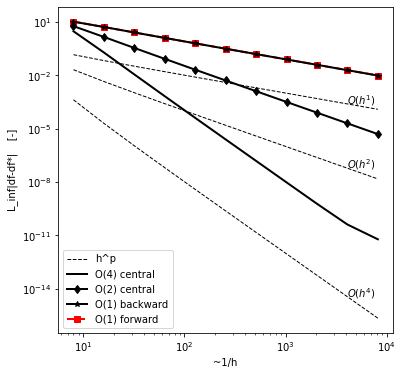

In [12]:
# Plot error
fig, axs = plt.subplots(1, figsize=(6,6))
axs.loglog(n_p_range, Linf_forward_k2, 'r--s', linewidth=2, label='O(1) forward')
axs.loglog(n_p_range, Linf_backward_k2, 'k-*', linewidth=2, label='O(1) backward')
axs.loglog(n_p_range, Linf_central_k2, 'k-d', linewidth=2, label='O(2) central')
axs.loglog(n_p_range, Linf_central_o4_k2, 'k-', linewidth=2, label='O(4) central')

axs.loglog(n_p_range, (1/(n_p_range-1)), 'k--', linewidth=1, label='h^p')
axs.loglog(n_p_range, (1/(n_p_range-1))**2, 'k--', linewidth=1)
axs.loglog(n_p_range, (1/(n_p_range-1))**4, 'k--', linewidth=1)


axs.text(n_p_range[-2], ((1/(n_p_range-1))**1)[-2], '$O(h^1)$')
axs.text(n_p_range[-2], ((1/(n_p_range-1))**2)[-2], '$O(h^2)$')
axs.text(n_p_range[-2], ((1/(n_p_range-1))**4)[-2], '$O(h^4)$')


handles, labels = axs.get_legend_handles_labels()

# reverse the order
axs.legend(handles[::-1], labels[::-1])
axs.set_ylabel('L_inf|df-df*|    [-]')
axs.set_xlabel('~1/h');

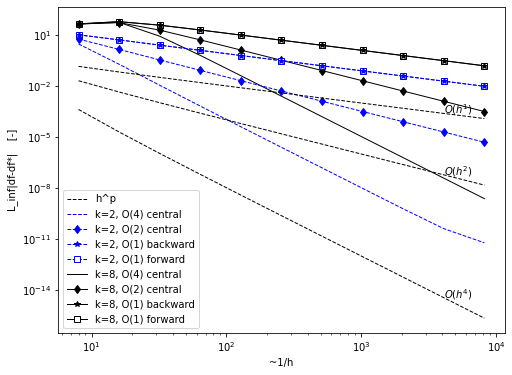

In [14]:
n_p_range=np.array([8,16,32,64,128,256,512,1024,2048,4096,8192])

Linf_forward_k8=np.zeros(n_p_range.shape)
Linf_backward_k8=np.zeros(n_p_range.shape)
Linf_central_k8=np.zeros(n_p_range.shape)
Linf_central_o4_k8=np.zeros(n_p_range.shape)

for idx in range(n_p_range.shape[0]):
  x, f, df=sample_fun(n_p_range[idx],8)
  diff=NUM_DIFF(x, f, n_p_range[idx])

  Linf_forward_k8[idx]=np.linalg.norm((diff.forward_diff()-df),np.inf)
  Linf_backward_k8[idx]=np.linalg.norm((diff.backward_diff()-df),np.inf)
  Linf_central_k8[idx]=np.linalg.norm((diff.central_diff()-df),np.inf)
  Linf_central_o4_k8[idx]=np.linalg.norm((diff.central_diff_O4()-df),np.inf)

# Plot error
fig, axs = plt.subplots(1, figsize=(8,6))
axs.loglog(n_p_range, Linf_forward_k8, 'k-s', markerfacecolor='w', linewidth=1, label='k=8, O(1) forward')
axs.loglog(n_p_range, Linf_backward_k8, 'k-*', linewidth=1, label='k=8, O(1) backward')
axs.loglog(n_p_range, Linf_central_k8, 'k-d', linewidth=1, label='k=8, O(2) central')
axs.loglog(n_p_range, Linf_central_o4_k8, 'k-', linewidth=1, label='k=8, O(4) central')
axs.loglog(n_p_range, Linf_forward_k2, 'b--s', markerfacecolor='w', linewidth=1, label='k=2, O(1) forward')
axs.loglog(n_p_range, Linf_backward_k2, 'b--*', linewidth=1, label='k=2, O(1) backward')
axs.loglog(n_p_range, Linf_central_k2, 'b--d', linewidth=1, label='k=2, O(2) central')
axs.loglog(n_p_range, Linf_central_o4_k2, 'b--', linewidth=1, label='k=2, O(4) central')

axs.loglog(n_p_range, (1/(n_p_range-1)), 'k--', linewidth=1, label='h^p')
axs.loglog(n_p_range, (1/(n_p_range-1))**2, 'k--', linewidth=1)
axs.loglog(n_p_range, (1/(n_p_range-1))**4, 'k--', linewidth=1)

axs.text(n_p_range[-2], ((1/(n_p_range-1))**1)[-2], '$O(h^1)$')
axs.text(n_p_range[-2], ((1/(n_p_range-1))**2)[-2], '$O(h^2)$')
axs.text(n_p_range[-2], ((1/(n_p_range-1))**4)[-2], '$O(h^4)$')

handles, labels = axs.get_legend_handles_labels()

# reverse the order
axs.legend(handles[::-1], labels[::-1])
axs.set_ylabel('L_inf|df-df*|    [-]')
axs.set_xlabel('~1/h');

**(e)** In the following table the number of grid points $n_{p,acc}$ required for the $L_{inf}$ to drop at one order of magnitude compared with $n_{p_0}=8$ are listed for all schemes for $k=1$ and $k=8$. (The listed values are rough estimates and interpolations from graphical data).
The number of points per wavelength is estimated as $ n_{ppw} = \frac{n_{p,acc}}{k} $. Here we build the estimate as the average $ n_{ppw} = \frac{1}{2} (n_{ppw, k=2} + n_{ppw, k=8}) $

| Method| Accuracy order | k=2 | k=8 | $ n_{ppw}$ |
| --- | :-: | --- | :-: | :-: |
| 2 points forward  differences | 1 | 64 | 256 | 32 |
| 2 points backward differences | 1 | 64 | 256 | 32 |
| 2 points central  differences | 2 | 32 | 160 | 18|
| 4 points central  differences | 4 | 16 | 64 | 8|

As expected the number of points per wavelength decreases for increasing approximation order

# Part B
**(a)** To garantee stability of the Euler Method an upwind scheme is used for spatial discretisation of $ c \cdot \frac{\partial u}{\partial x}$. Since $ c > 0$, a 2 points backward difference is implemented. The boundary conditions are set to periodic boundaries on both sides.

In [15]:
class ADVECTION_1D():
  def __init__(self,x,u0,a,cfl,t0,tend):
    self.x=x
    self.u0=u0
    self.x0=self.x[0]
    self.xend=self.x[-1]
    self.n_x=int(self.x.shape[0])
    self.dx=(self.xend-self.x0)/(self.n_x-1)
    self.a=a
    self.cfl=cfl
    self.t0=t0
    self.tend=tend

  def backward_diff(self,u):
    f=np.insert(u, 0, u[-2], axis=0) # periodic boundary condition
    du=(f[1:]-f[0:-1])/self.dx
    return du

  def compute_dt(self):
    return (self.cfl*self.dx)/self.a

  def computeCFL(self):
       return np.abs(self.a*self.dt/self.dx)
  
  def checkCFL(self):
    if (self.computeCFL()<=1):
      flag=True 
    else:
      flag=False
    return flag

  def n_t(self):
    return int(np.ceil((self.tend-self.t0+self.compute_dt())/self.compute_dt()))

  def time_vec(self):
    return np.linspace(self.t0, self.tend, self.n_t())

  def euler_method(self):
    u=np.zeros((self.n_x,self.n_t()))
    u[:,0]=self.u0

    for t in range(1,self.time_vec().shape[0]): 
      u[:,t]=u[:,t-1]-self.compute_dt()*self.backward_diff(u[:,t-1]) 
    return u

  def FD_143stencil(self,u):
    f=np.insert(u, 0, u[-3:-1], axis=0) # periodic boundary condition 
    du=(3*f[2:]-4*f[1:-1]+f[0:-2])/self.dx
    return du

  def heun_method(self):
    u=np.zeros((self.n_x,self.n_t()))
    u[:,0]=self.u0

    for t in range(1,self.time_vec().shape[0]): 
      u_int=u[:,t-1]-self.compute_dt()*self.FD_143stencil(u[:,t-1]) 
      u[:,t]=u[:,t-1]-(self.compute_dt()*0.5)*(
                                self.FD_143stencil(u[:,t-1]) +
                                self.FD_143stencil(u_int))
    return u

In [16]:
k=2
x, u0, _=sample_fun(100,k)
advection_1d=ADVECTION_1D(x,u0,1,1,0,1)

print('time step with respect to CFL condition: ', advection_1d.compute_dt())
advection_1d.checkCFL

u =advection_1d.euler_method()

time step with respect to CFL condition:  0.010101010101010102


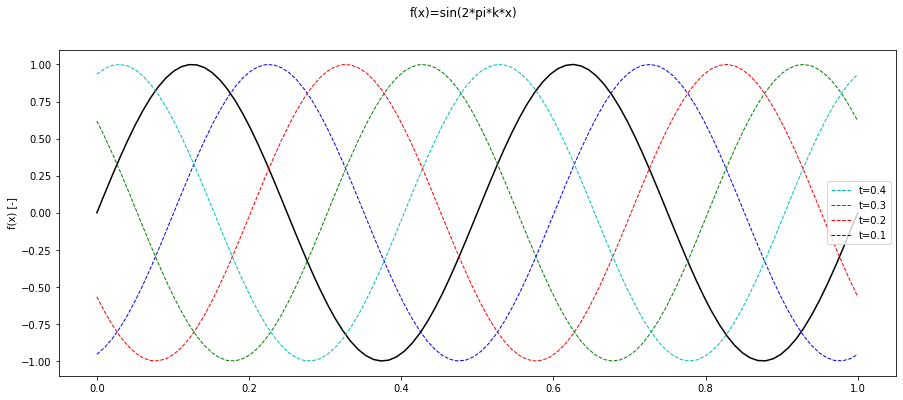

In [17]:
# plot approximations
fig, axs = plt.subplots(1, figsize=(15,6))
fig.suptitle('f(x)=sin(2*pi*k*x)')
axs.plot(x, u0, 'k-')
axs.plot(x, u[:,10], 'b--', linewidth=1, label='t=0.1')
axs.plot(x, u[:,20], 'r--', linewidth=1, label='t=0.2')
axs.plot(x, u[:,30], 'g--', linewidth=1, label='t=0.3')
axs.plot(x, u[:,40], 'c--', linewidth=1, label='t=0.4')


handles, labels = axs.get_legend_handles_labels()

# reverse the order
axs.legend(handles[::-1], labels[::-1])
axs.set_ylabel('x    [-]')
axs.set_ylabel('f(x) [-]');


In [ ]:
# Interactive plot
#import matplotlib.pyplot as plt
#from matplotlib.animation import FuncAnimation
#
#fig, ax = plt.subplots()
#line, = ax.plot([])     # A tuple unpacking to unpack the only plot
#ax.set_xlim(0, 1)
#ax.set_ylim(-1.1, 1.1)
#
#def animate(frame_num,x,u):
#    y = u[:,frame_num]
#    line.set_data((x, y))
#    return line
#
#anim = FuncAnimation(fig, animate , frames=10, interval=200, fargs=(x,u, ))
#plt.show()

**(b)** The error of the implemented first order accuracy forward difference in consistant with the theoretical values. 
Compared to results from PART A larger error are obtained for the same discretizations. To reduce the error by one order of accuracy starting from $n_p = 8$, 512 grid points were needed. The latter observation yields an estimated $n_{ppw}=256$, which is not consistant with the observations from PART A. One possible explanation is the error propagation in time. Where the initial wave is captured through the space operator, it is passed through the Euler-Scheme, yielding to an error transport to the following time step, where the time stepping error accumulates again with the differentiation error. To test this hypothesis, we plot the error propagation through time at a constant $n_p=512$.

In [18]:
def exact_solution(x,t,k):
  return np.sin(2*np.pi*k*(x-t))

def Linf(u1, u2):
  return np.linalg.norm(np.abs(u2-u1),np.inf)

In [19]:
k=2
a=1
cfl=0.34
t0=0
tend=1
n_p_range=np.array([8,16,32,64,128,256,512,1024,2048,4096,8192])
Linf_advection=np.zeros(n_p_range.shape)

for idx in range(n_p_range.shape[0]):
  x, u0, df=sample_fun(n_p_range[idx],k)
  advection_1d=ADVECTION_1D(x,u0,a,cfl,t0,tend)
  advection_1d.checkCFL
  print('Computing solution for n_p:     ',n_p_range[idx])
  u_T =advection_1d.euler_method()[:,-1]
  Linf_advection[idx]=Linf(exact_solution(x,tend,k),u_T)

Computing solution for n_p:      8
Computing solution for n_p:      16
Computing solution for n_p:      32
Computing solution for n_p:      64
Computing solution for n_p:      128
Computing solution for n_p:      256
Computing solution for n_p:      512
Computing solution for n_p:      1024
Computing solution for n_p:      2048
Computing solution for n_p:      4096
Computing solution for n_p:      8192


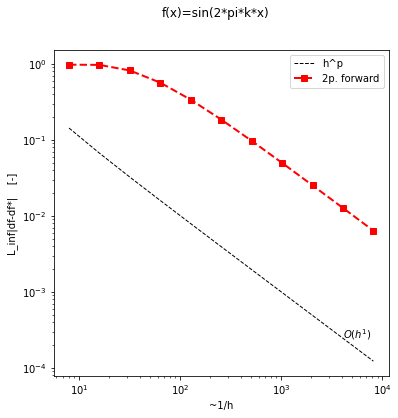

In [20]:
#plot error
fig, axs = plt.subplots(1, figsize=(6,6))
fig.suptitle('f(x)=sin(2*pi*k*x)')
axs.loglog(n_p_range, Linf_advection, 'r--s', linewidth=2, label='2p. forward')
axs.loglog(n_p_range, (1/(n_p_range-1)), 'k--', linewidth=1, label='h^p')
axs.text(n_p_range[-2], ((1/(n_p_range-1))**1)[-2], '$O(h^1)$')

handles, labels = axs.get_legend_handles_labels()

# reverse the order
axs.legend(handles[::-1], labels[::-1])
axs.set_ylabel('L_inf|df-df*|    [-]')
axs.set_xlabel('~1/h');

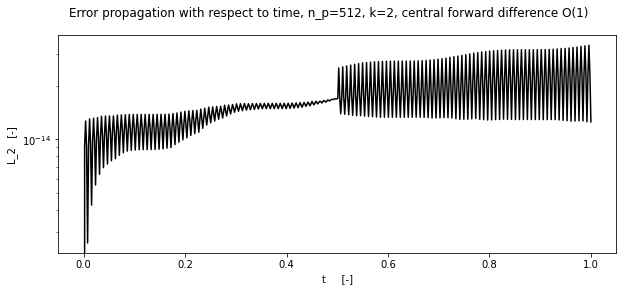

In [21]:
k=2
n_p=512
x, u0, _=sample_fun(n_p,k)
advection_1d=ADVECTION_1D(x,u0,1,1,0,1)
advection_1d.checkCFL
u =advection_1d.euler_method();

u_exact = np.zeros(u.shape)
for t_ind in range(advection_1d.time_vec().shape[0]):
  u_exact[:,t_ind]=exact_solution(x,advection_1d.time_vec()[t_ind],k)

error_time=np.linalg.norm(u_exact-u, ord=2, axis=0)

fig, axs = plt.subplots(1, figsize=(10,4))
fig.suptitle('Error propagation with respect to time, n_p=512, k=2, central forward difference O(1)')
axs.semilogy(x, error_time, 'k-')
axs.set_xlabel('t     [-]')
axs.set_ylabel('L_2   [-]');

**(c)** Solving the 1D advection equation using a 2nd order spatial operator (3/-4/1 stencil) shows consistant results with the theoretical behaviour. As shown in PART A the second order scheme needs a significantly smaller number of grid points to reach a similar accuracy like the first order scheme. 

In [22]:
k=2
x, u0, _=sample_fun(100,k)
advection_1d=ADVECTION_1D(x,u0,1,0.34,0,1)
advection_1d.checkCFL
u = advection_1d.heun_method();

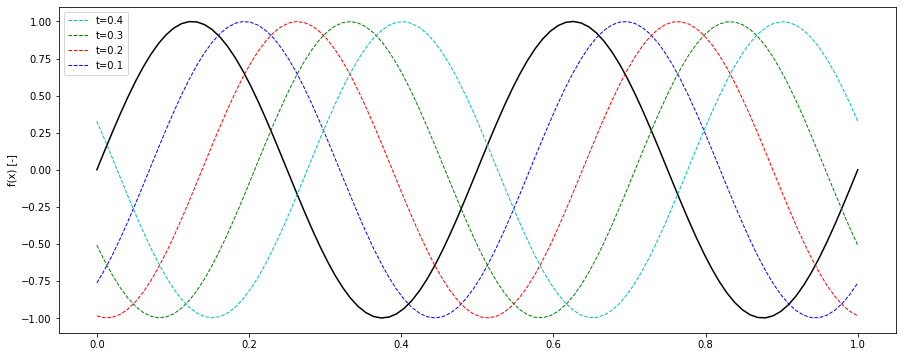

In [23]:
# plot approximations
fig, axs = plt.subplots(1, figsize=(15,6))
axs.plot(x, u0, 'k-')
axs.plot(x, u[:,10], 'b--', linewidth=1, label='t=0.1')
axs.plot(x, u[:,20], 'r--', linewidth=1, label='t=0.2')
axs.plot(x, u[:,30], 'g--', linewidth=1, label='t=0.3')
axs.plot(x, u[:,40], 'c--', linewidth=1, label='t=0.4')


handles, labels = axs.get_legend_handles_labels()

# reverse the order
axs.legend(handles[::-1], labels[::-1])
axs.set_ylabel('x    [-]')
axs.set_ylabel('f(x) [-]');

In [24]:
k=2
a=1
cfl=0.1
t0=0
tend=1
n_p_range=np.array([8,16,32,64,128,256,512,1024,2048,4096,8192])
Linf_advection_heun=np.zeros(n_p_range.shape)

for idx in range(n_p_range.shape[0]):
  x, u0, df=sample_fun(n_p_range[idx],k)
  advection_1d=ADVECTION_1D(x,u0,a,cfl,t0,tend)
  advection_1d.checkCFL
  print('Computing solution for n_p:     ',n_p_range[idx])
  Linf_advection_heun[idx]=Linf(exact_solution(x,tend,k),advection_1d.heun_method()[:,-1])

Computing solution for n_p:      8
Computing solution for n_p:      16
Computing solution for n_p:      32
Computing solution for n_p:      64
Computing solution for n_p:      128
Computing solution for n_p:      256
Computing solution for n_p:      512
Computing solution for n_p:      1024
Computing solution for n_p:      2048
Computing solution for n_p:      4096
Computing solution for n_p:      8192


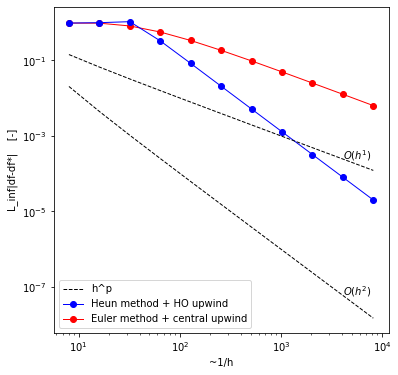

In [25]:
#plot error
fig, axs = plt.subplots(1, figsize=(6,6))
axs.loglog(n_p_range, Linf_advection, 'r-o', linewidth=1, label='Euler method + central upwind')
axs.loglog(n_p_range, Linf_advection_heun, 'b-o', linewidth=1, label='Heun method + HO upwind')
axs.loglog(n_p_range, (1/(n_p_range-1)), 'k--', linewidth=1, label='h^p')
axs.loglog(n_p_range, (1/(n_p_range-1))**2, 'k--', linewidth=1)

axs.text(n_p_range[-2], ((1/(n_p_range-1))**1)[-2], '$O(h^1)$')
axs.text(n_p_range[-2], ((1/(n_p_range-1))**2)[-2], '$O(h^2)$')

handles, labels = axs.get_legend_handles_labels()

axs.legend(handles[::-1], labels[::-1])
axs.set_ylabel('L_inf|df-df*|    [-]')
axs.set_xlabel('~1/h');

# Conclusion

- During the approximation of a derivative with different central difference operators it was found that schemes with a higher order of accuracy need a significantly lower number of points to achieve the same accuracy as first order scheme.
- Using the $n_{ppw}$ criterion it was found that the performance of a 4 point finite difference central scheme surpassed that of a 2 point central scheme and the latter supassed the performance of a 2 point forward and backward difference. The listed methods are respectively of order 1, 2 and 4.
- An convergence analysis of the numerical solution of the 1D advection equation for different spatial resolutions using first order spatial operator with an upwind first order scheme yields consistant results behaviour with the expected theoretical accuracy. However the $n_{ppw}$ value of the scheme was found to be higher than that derived from a pure approximation task not combined with a time-stepping scheme.
- Using a higher order scheme (Heun's Method combined with a 2nd order accuracy 3 point backward difference) significantly reduced the number of grid points required to achieve a given accuracy. 
- The accuracy could be increased by the scheme order for the same grid size, however it should be noted that the computational requirement per degree of freedom increases, partially due to stability constraints. To guarantee the stability of the higher order scheme a significantly lower CFL condition had to be set resulting in a much finer time scale.